## Week 2: Individual Assignment
This week I am exploring a data set of Regulatory Signs from the LA City Geohub, which we may use in our project. The data I'm looking at includes all traffic regulatory signs, such as speed limit, no left turns, weight restrictions and other signs for motorists, and only includes Los Angeles City streets. This data might be helpful in our project to learn about the physical characteristics of the street, which we plan to analyze layered with where the most traffic fatalities occur. The data and more info about it can be found [here](https://geohub.lacity.org/datasets/regulatory-signs/explore?location=34.009880%2C-118.405989%2C13.00).



## Importing the geopanda modules and data set

In [30]:
import geopandas as gpd

In [31]:
regulatorysigns = gpd.read_file('Data/Regulatory_Signs.zip')

In [33]:
type(regulatorysigns)

geopandas.geodataframe.GeoDataFrame

## Learning basic info about the dataset

**How many rows and columns of data?**

In [35]:
regulatorysigns.shape

(35477, 10)

**What are the column categories?**

In [37]:
regulatorysigns.columns.to_list()

['OBJECTID',
 'STKNUMBER',
 'DESCRIPTIO',
 'SIZE',
 'MATERIAL',
 'CLASS',
 'ID',
 'TOOLTIP',
 'LegendDesc',
 'geometry']

**What data types are in each columns?**

In [38]:
regulatorysigns.info

<bound method DataFrame.info of        OBJECTID STKNUMBER                                         DESCRIPTIO  \
0         25433      1120                                     Speed Limit 35   
1         25437      1120                                     Speed Limit 35   
2         25438      1561  No Peds Crossing, Symbol, Use Crosswalk, Left ...   
3         25445      1050                                     Speed Limit 35   
4         25446      1395                               No Left Turn, Symbol   
...         ...       ...                                                ...   
35472    186553      1240                                   Keep Right Arrow   
35473    186554      1240                                   Keep Right Arrow   
35474    186561      1326                          Do Not Block Intersection   
35475    186562      1326                          Do Not Block Intersection   
35476    186563      1390                               No Left Turn, Symbol   

       

**What does the beginning and the end of the data set look like?**

In [39]:
regulatorysigns.head()

,OBJECTID,STKNUMBER,DESCRIPTIO,SIZE,MATERIAL,CLASS,ID,TOOLTIP,LegendDesc,geometry
0,25433,1120,Speed Limit 35,24x30,SEG,Regulatory,1,Description: Speed Limit 35\nStock Number: 112...,Speed Limit 35 Signs,POINT (-118.50101 34.21390)
1,25437,1120,Speed Limit 35,24x30,SEG,Regulatory,2,Description: Speed Limit 35\nStock Number: 112...,Speed Limit 35 Signs,POINT (-118.50253 34.22196)
2,25438,1561,"No Peds Crossing, Symbol, Use Crosswalk, Left ...",18x24,P/S,Regulatory,3,"Description: No Peds Crossing, Symbol, Use Cro...",None,POINT (-118.50136 34.21780)
3,25445,1050,Speed Limit 35,36x45,SEG,Regulatory,4,Description: Speed Limit 35\nStock Number: 105...,Speed Limit 35 Signs,POINT (-118.50140 34.20002)
4,25446,1395,"No Left Turn, Symbol",24x24,DG,Regulatory,5,"Description: No Left Turn, Symbol\nStock Numbe...",None,POINT (-118.50193 34.28681)


In [40]:
regulatorysigns.tail()

,OBJECTID,STKNUMBER,DESCRIPTIO,SIZE,MATERIAL,CLASS,ID,TOOLTIP,LegendDesc,geometry
35472,186553,1240,Keep Right Arrow,24x30,HI,Regulatory,35473,Description: Keep Right Arrow\nStock Number: 1...,Keep Right Arrow Signs,POINT (-118.27626 34.11805)
35473,186554,1240,Keep Right Arrow,24x30,HI,Regulatory,35474,Description: Keep Right Arrow\nStock Number: 1...,Keep Right Arrow Signs,POINT (-118.27626 34.11805)
35474,186561,1326,Do Not Block Intersection,24x30,SEG,Regulatory,35475,Description: Do Not Block Intersection\nStock ...,None,POINT (-118.27234 34.10675)
35475,186562,1326,Do Not Block Intersection,24x30,SEG,Regulatory,35476,Description: Do Not Block Intersection\nStock ...,None,POINT (-118.27234 34.10675)
35476,186563,1390,"No Left Turn, Symbol",30x30,DG,Regulatory,35477,"Description: No Left Turn, Symbol\nStock Numbe...",No Left Turn Signs,POINT (-118.25499 34.09151)


## Exploring the types of signs

Because I'm interested in the signage to learn about the physical characteristics of the streets, I want to explore the "Description" column of the data, which tells you what type of sign it is. For example, I could use this part of the data to learn about the speed limits throughout LA City. 

**What types of signs are in the data?**

In [43]:
regulatorysigns['DESCRIPTIO'].value_counts()

Speed Limit 35                                               4222
One Way With Arrow Right                                     3745
No Trucks, Symbol Over 6000 pounds                           3013
One Way With Arrow Left                                      2094
Speed Limit 30                                               1853
                                                             ... 
No Peds Crossing, Symbol                                        4
One Way With Arrow Right Single Faced Mast Arm (S450.0)**       3
Restriction Plate 3 PM to 7 PM Except Saturday/Sunday           1
Left Turn, Symbol                                               1
One Way With Arrow Left, Single Faced Mast Arm (S450.0)**       1
Name: DESCRIPTIO, Length: 77, dtype: int64

_From this I realized that only a limited number of column values are displayed with this function, and that there are 77 different types of signs in this data._

In [44]:
regulatorysigns['DESCRIPTIO'].sample(20)

7140                         Speed Limit 35
10314            Right Lane Must Turn Right
2253               One Way With Arrow Right
28518                        Left Turn Only
2753                         Speed Limit 35
22694               One Way With Arrow Left
34651             No Left or U Turn, Symbol
230                          Speed Limit 35
11203                        Speed Limit 35
33567                        Speed Limit 35
11825                          Signal 3-Way
34967                      Keep Right Arrow
171                            Signal 3-Way
16007                       Right Turn Only
18097                        Speed Limit 35
24397                        Speed Limit 35
17384            Right Lane Must Turn Right
6648                   No Left Turn, Symbol
10050                     No U Turn, Symbol
24534    No Trucks, Symbol Over 6000 pounds
Name: DESCRIPTIO, dtype: object

**How many of each type of sign are there?**

In [52]:
description_count = regulatorysigns['DESCRIPTIO'].value_counts()

In [53]:
description_count

Speed Limit 35                                               4222
One Way With Arrow Right                                     3745
No Trucks, Symbol Over 6000 pounds                           3013
One Way With Arrow Left                                      2094
Speed Limit 30                                               1853
                                                             ... 
No Peds Crossing, Symbol                                        4
One Way With Arrow Right Single Faced Mast Arm (S450.0)**       3
Restriction Plate 3 PM to 7 PM Except Saturday/Sunday           1
Left Turn, Symbol                                               1
One Way With Arrow Left, Single Faced Mast Arm (S450.0)**       1
Name: DESCRIPTIO, Length: 77, dtype: int64

In [54]:
description_count = description_count.reset_index()

In [55]:
description_count

,index,DESCRIPTIO
0,Speed Limit 35,4222
1,One Way With Arrow Right,3745
2,"No Trucks, Symbol Over 6000 pounds",3013
3,One Way With Arrow Left,2094
4,Speed Limit 30,1853
...,...,...
72,"No Peds Crossing, Symbol",4
73,One Way With Arrow Right Single Faced Mast Arm...,3
74,Restriction Plate 3 PM to 7 PM Except Saturday...,1
75,"Left Turn, Symbol",1


In [58]:
description_count.columns = ['Sign Type', 'Count']

In [59]:
description_count

,Sign Type,Count
0,Speed Limit 35,4222
1,One Way With Arrow Right,3745
2,"No Trucks, Symbol Over 6000 pounds",3013
3,One Way With Arrow Left,2094
4,Speed Limit 30,1853
...,...,...
72,"No Peds Crossing, Symbol",4
73,One Way With Arrow Right Single Faced Mast Arm...,3
74,Restriction Plate 3 PM to 7 PM Except Saturday...,1
75,"Left Turn, Symbol",1


**Can I visualized this data in a meaningful way?**

<AxesSubplot:>

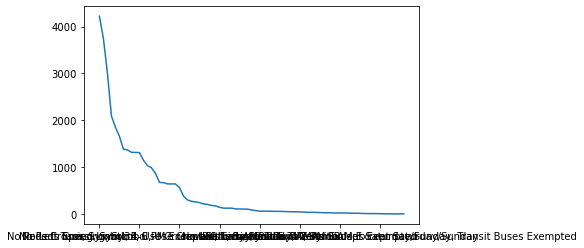

In [60]:
desription_count.plot()

<AxesSubplot:>

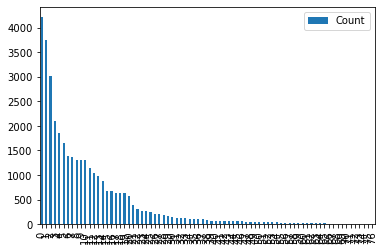

In [69]:
description_count.plot.bar()

_These are both not super helpful because of the large number of types of descriptions in the selected column._

## Filtering the data

**Can I narrow down what data I'm looking at to make it easier to interpret?**

In [70]:
regulatorysigns.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35477 entries, 0 to 35476
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    35477 non-null  int64   
 1   STKNUMBER   35477 non-null  object  
 2   DESCRIPTIO  35477 non-null  object  
 3   SIZE        35353 non-null  object  
 4   MATERIAL    35353 non-null  object  
 5   CLASS       35477 non-null  object  
 6   ID          35477 non-null  int64   
 7   TOOLTIP     35477 non-null  object  
 8   LegendDesc  20613 non-null  object  
 9   geometry    35477 non-null  geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 2.7+ MB


**Trim the data to just include the type of sign, its size, and where it's located**

In [76]:
desired_columns = ['DESCRIPTIO', 'SIZE', 'geometry']

In [77]:
regulatorysigns[desired_columns]

,DESCRIPTIO,SIZE,geometry
0,Speed Limit 35,24x30,POINT (-118.50101 34.21390)
1,Speed Limit 35,24x30,POINT (-118.50253 34.22196)
2,"No Peds Crossing, Symbol, Use Crosswalk, Left ...",18x24,POINT (-118.50136 34.21780)
3,Speed Limit 35,36x45,POINT (-118.50140 34.20002)
4,"No Left Turn, Symbol",24x24,POINT (-118.50193 34.28681)
...,...,...,...
35472,Keep Right Arrow,24x30,POINT (-118.27626 34.11805)
35473,Keep Right Arrow,24x30,POINT (-118.27626 34.11805)
35474,Do Not Block Intersection,24x30,POINT (-118.27234 34.10675)
35475,Do Not Block Intersection,24x30,POINT (-118.27234 34.10675)


In [80]:
regulatorysigns_trimmed = regulatorysigns[desired_columns].copy()

In [81]:
regulatorysigns_trimmed

,DESCRIPTIO,SIZE,geometry
0,Speed Limit 35,24x30,POINT (-118.50101 34.21390)
1,Speed Limit 35,24x30,POINT (-118.50253 34.22196)
2,"No Peds Crossing, Symbol, Use Crosswalk, Left ...",18x24,POINT (-118.50136 34.21780)
3,Speed Limit 35,36x45,POINT (-118.50140 34.20002)
4,"No Left Turn, Symbol",24x24,POINT (-118.50193 34.28681)
...,...,...,...
35472,Keep Right Arrow,24x30,POINT (-118.27626 34.11805)
35473,Keep Right Arrow,24x30,POINT (-118.27626 34.11805)
35474,Do Not Block Intersection,24x30,POINT (-118.27234 34.10675)
35475,Do Not Block Intersection,24x30,POINT (-118.27234 34.10675)


**Can I just look at where the speed limit is 35mph?**

In [82]:
regulatorysigns_trimmed[regulatorysigns_trimmed.DESCRIPTIO == 'Speed Limit 35']

,DESCRIPTIO,SIZE,geometry
0,Speed Limit 35,24x30,POINT (-118.50101 34.21390)
1,Speed Limit 35,24x30,POINT (-118.50253 34.22196)
3,Speed Limit 35,36x45,POINT (-118.50140 34.20002)
5,Speed Limit 35,24x30,POINT (-118.50259 34.24628)
6,Speed Limit 35,24x30,POINT (-118.50219 34.25855)
...,...,...,...
35449,Speed Limit 35,36x45,POINT (-118.28143 34.06051)
35452,Speed Limit 35,36x45,POINT (-118.50109 34.16072)
35453,Speed Limit 35,24x30,POINT (-118.50110 34.16497)
35454,Speed Limit 35,36x45,POINT (-118.50110 34.16497)


**Can I visualized where the signs are located?**

<AxesSubplot:>

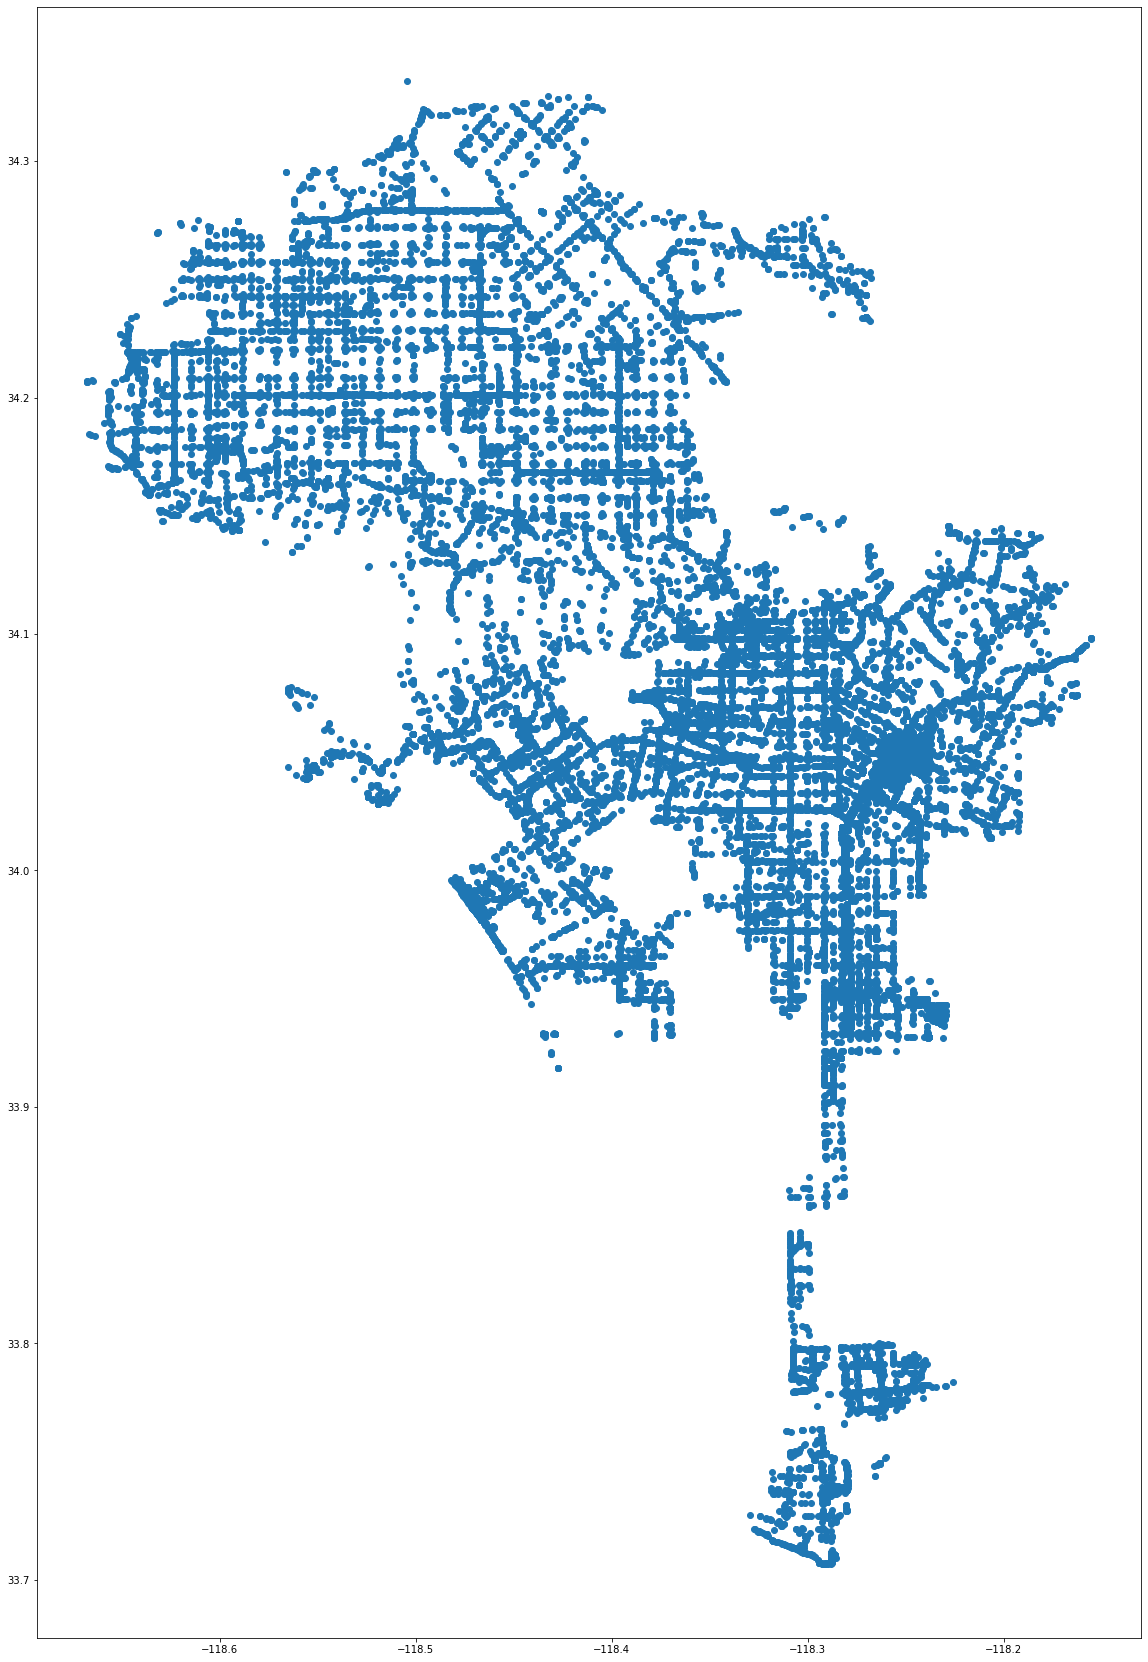

In [91]:
regulatorysigns_trimmed.plot(
    figsize = (30,30)
)

_This is not super informative other than to show the shape of the boundaries of the data, and to demonstrate where signage is denser_

<AxesSubplot:>

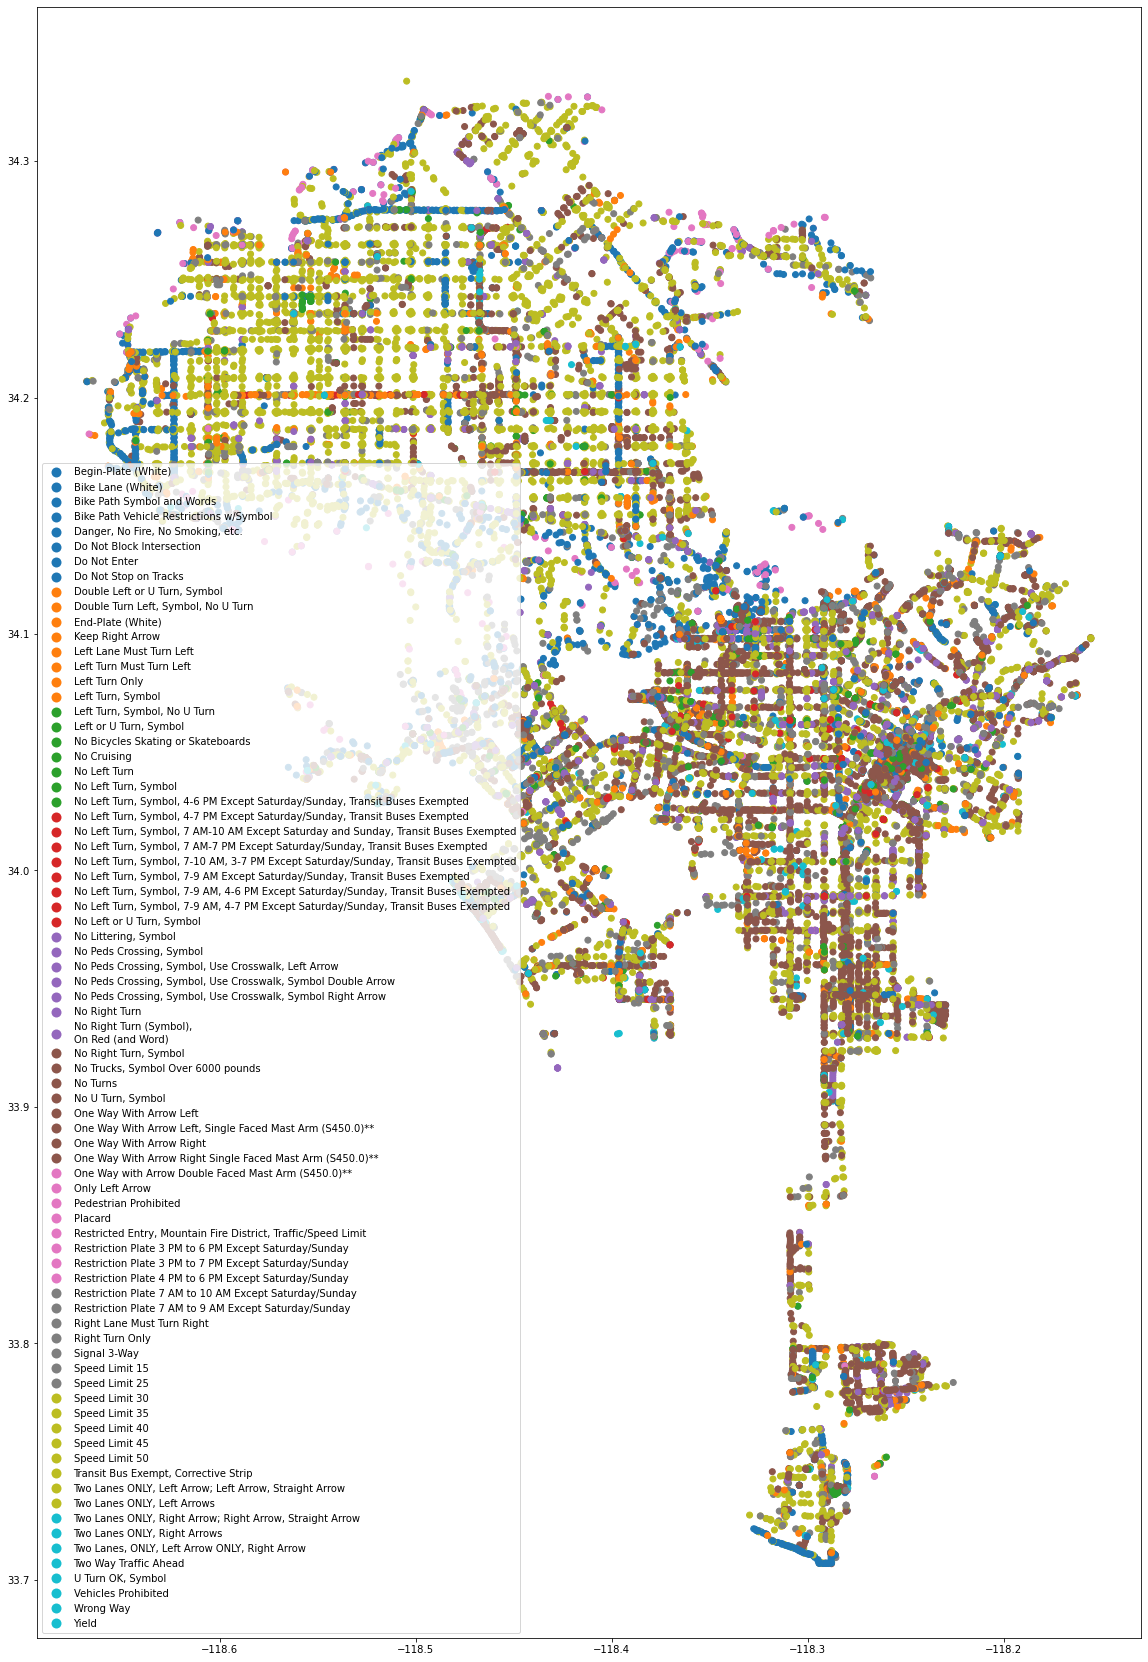

In [90]:
regulatorysigns_trimmed.plot(
        figsize=(30,30),
        column = 'DESCRIPTIO',
        legend = True
)

In [93]:
import folium

In [100]:
m = folium.Map(location=(34.0522, -118.2437))

In [101]:
m

In [107]:
for index, row in regulatorysigns_trimmed.iterrows():
    folium.Marker([row.geometry], popup=row.DESCRIPTIO, tooltop=row.DESCRIPTIO).add_to(m)
m

ValueError: Expected two (lat, lon) values for location, instead got: [<shapely.geometry.point.Point object at 0x7f24fe357c10>].

_Realized that my data does not have Long and Lat as individual data points. I beleive I would have to seperate out the Lat and long data that is currently together in one cell under "Geometry" column, for now I just used the approx location of Los Angeles to center my map, but will have to look more into this in order to plot the points on the folium map!_